<a href="https://colab.research.google.com/github/charujhagrawat20/StackIt/blob/main/Prac9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actual Output : [0 1 1 0]
Predicted Output : [0.29414874 0.64732668 0.33345269 0.70829885]


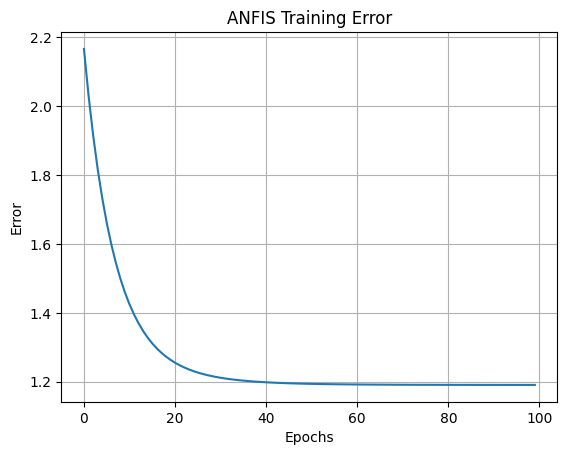

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def gaussmf(x, c, sigma):
    return np.exp(-((x - c) ** 2) / (2 * sigma ** 2))
class ANFIS:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.n = X.shape[0]
        self.c1, self.s1 = 0.0, 1.0
        self.c2, self.s2 = 1.0, 1.0
        self.p = np.random.rand(2)
        self.q = np.random.rand(2)
        self.r = np.random.rand(2)
        self.errors = []
    def train(self, epochs=100, lr=0.01):
        for _ in range(epochs):
            error_sum = 0
            for i in range(self.n):
                x1, x2 = self.X[i]
                y = self.Y[i]
                mu1 = gaussmf(x1, self.c1, self.s1)
                mu2 = gaussmf(x2, self.c2, self.s2)
                w1, w2 = mu1, mu2
                w1n = w1 / (w1 + w2)
                w2n = w2 / (w1 + w2)
                f1 = self.p[0]*x1 + self.q[0]*x2 + self.r[0]
                f2 = self.p[1]*x1 + self.q[1]*x2 + self.r[1]
                y_pred = w1n*f1 + w2n*f2
                error = y - y_pred
                error_sum += error**2
                self.p += lr * error
                self.q += lr * error
                self.r += lr * error
            self.errors.append(error_sum)
    def predict(self, X):
        out = []
        for x1, x2 in X:
            mu1 = gaussmf(x1, self.c1, self.s1)
            mu2 = gaussmf(x2, self.c2, self.s2)
            w1n = mu1 / (mu1 + mu2)
            w2n = mu2 / (mu1 + mu2)
            f1 = self.p[0]*x1 + self.q[0]*x2 + self.r[0]
            f2 = self.p[1]*x1 + self.q[1]*x2 + self.r[1]
            out.append(w1n*f1 + w2n*f2)
        return np.array(out)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([0, 1, 1, 0])
model = ANFIS(X, Y)
model.train(epochs=100, lr=0.01)
print("Actual Output :", Y)
print("Predicted Output :", model.predict(X))
plt.plot(model.errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("ANFIS Training Error")
plt.grid()
plt.show()